# Rocks analysis demo. 

* Add instruction here or in readme for how to set up your own analysis pipeline. 

In [1]:
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np

# Jupyter Lab imports.
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed

# Path to local imports.
sys.path.append("/home/drew/He6CRES/rocks_analysis_pipeline/")
from results import ExperimentResults
from rocks_utility import he6cres_db_query

## Step 0: Query the postgres database to see what run_ids to analyze. 

In [12]:
query_run_log = '''
                    SELECT run_id, run_notes, set_field, created_at, EXTRACT(MONTH from created_at::date) as month
                    FROM he6cres_runs.run_log
                    WHERE num_spec_acq = 100 AND
                    EXTRACT(MONTH from created_at::date) = 10
                    ORDER BY run_id DESC 
                    LIMIT 80
                  '''

run_log = he6cres_db_query(query_run_log, rocks = False)

first_rid_per_field = run_log.groupby(["set_field"]).last()
display(first_rid_per_field)

he6_run_list = first_rid_per_field.run_id.to_list()

print(" ".join(str(x) for x in he6_run_list))

,run_id,run_notes,created_at,month
set_field,,,,
0.75,557,0.75T run 1/5. Note rga is not working. Ion ga...,2022-10-07 01:23:38.096859,10.0
1.00,548,1.00T run 1/5,2022-10-06 21:32:01.385208,10.0
1.25,542,1.25T run 1/5,2022-10-06 16:21:25.710881,10.0
1.50,536,1.50T run 1/5,2022-10-06 14:16:32.946441,10.0
1.75,530,1.75T run 1/5,2022-10-06 12:38:41.816199,10.0
2.00,524,2.00T run 1/5,2022-10-06 11:11:11.133446,10.0
2.25,518,2.25T run 1/5,2022-10-06 09:17:37.705381,10.0
2.50,512,2.50T run 1/5,2022-10-06 07:58:14.636864,10.0
2.75,506,2.75T run 1/5,2022-10-06 06:38:56.628976,10.0


557 548 542 536 530 524 518 512 506 500 492


## Step 1: Analyze the run_ids. 

* Follow the instructions in the [readme](https://github.com/Helium6CRES/rocks_analysis_pipeline).

## Step 2: Visualize the results and/or build a spectrum. 

### 2a: Grab the experiment directory and root files from rocks.

In [4]:
local_dir = "/media/drew/T7 Shield/rocks_analysis/saved_experiments"
experiment_name = "ne_second_try"
analysis_id = 0
include_root_files = True
max_root_files_to_grab = 2
rebuild_experiment_dir = True

In [5]:
exp_results_demo = ExperimentResults(local_dir = local_dir, 
                                     experiment_name = experiment_name, 
                                     analysis_id = analysis_id, 
                                     include_root_files = include_root_files,
                                     max_root_files_to_grab = max_root_files_to_grab,
                                     rebuild_experiment_dir=rebuild_experiment_dir,
                                    )

Rebuilding local experiment dir.

Copying analysis directory from rocks. This may take a few minutes.



Making /media/drew/T7 Shield/rocks_analysis/saved_experiments/ne_second_try_aid_0/root_files
Copying from remote path:  /data/eliza4/he6_cres/katydid_analysis/root_files/rid_0492/aid_000/Freq_data_2022-10-05-19-27-55_000.root
Got above file. Put it: /media/drew/T7 Shield/rocks_analysis/saved_experiments/ne_second_try_aid_0/root_files/Freq_data_2022-10-05-19-27-55_000.root 
Copying from remote path:  /data/eliza4/he6_cres/katydid_analysis/root_files/rid_0492/aid_000/Freq_data_2022-10-05-19-27-59_000.root
Got above file. Put it: /media/drew/T7 Shield/rocks_analysis/saved_experiments/ne_second_try_aid_0/root_files/Freq_data_2022-10-05-19-27-59_000.root 
Copying from remote path:  /data/eliza4/he6_cres/katydid_analysis/root_files/rid_0500/aid_000/Freq_data_2022-10-05-21-46-39_000.root
Got above file. Put it: /media/drew/T7 Shield/rocks_analysis/saved_experiments/ne_second_try_aid_0/root

### 2b: Look at the attributes of the exp_results_demo object.

In [6]:
exp_results_demo.root_files.head(3)

,run_id,spec_id,file_path,true_field,analysis_id,root_file_exists,file_id,rocks_file_path,exists,approx_slope,...,base_config_path,output_dir,noise_file_path,rocks_noise_file_path,root_file_path,pst_time,utc_time,monitor_rate,field,set_field
0,557,17272,/mnt/sdb/data/Freq_data_2022-10-06-18-13-24.spec,0.750156,0,True,0,/data/eliza4/he6_cres/sdb/data/Freq_data_2022-...,True,5.127162e+08,...,/data/eliza4/he6_cres/katydid_analysis/base_co...,/data/eliza4/he6_cres/katydid_analysis/root_fi...,/mnt/sdb/data/Freq_data_2022-08-18-11-31-49.spec,/data/eliza4/he6_cres/sdb/data/Freq_data_2022-...,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-10-06 18:13:24-07:00,2022-10-07 01:13:24+00:00,12070.00,0.750156,0.75
1,557,17273,/mnt/sdc/data/Freq_data_2022-10-06-18-13-28.spec,0.750156,0,True,1,/data/eliza4/he6_cres/sdc/data/Freq_data_2022-...,True,5.127162e+08,...,/data/eliza4/he6_cres/katydid_analysis/base_co...,/data/eliza4/he6_cres/katydid_analysis/root_fi...,/mnt/sdb/data/Freq_data_2022-08-18-11-31-49.spec,/data/eliza4/he6_cres/sdb/data/Freq_data_2022-...,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-10-06 18:13:28-07:00,2022-10-07 01:13:28+00:00,12000.00,0.750156,0.75
2,557,17274,/mnt/sdd/data/Freq_data_2022-10-06-18-13-32.spec,0.750156,0,True,2,/data/eliza4/he6_cres/sdd/data/Freq_data_2022-...,True,5.127162e+08,...,/data/eliza4/he6_cres/katydid_analysis/base_co...,/data/eliza4/he6_cres/katydid_analysis/root_fi...,/mnt/sdb/data/Freq_data_2022-08-18-11-31-49.spec,/data/eliza4/he6_cres/sdb/data/Freq_data_2022-...,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-10-06 18:13:32-07:00,2022-10-07 01:13:32+00:00,12132.13,0.750155,0.75


In [7]:
exp_results_demo.tracks.head(3)

,UniqueID,Bits,Component,AcquisitionID,TrackID,EventID,EventSequenceID,IsCut,StartTimeInRunC,StartTimeInAcq,...,FreqIntc,TimeIntc,MeanTrackSNR,set_field,TimeIntc_mean,TimeIntc_std,TimeLength_mean,TimeLength_std,Slope_mean,Slope_std
0,0.0,50331648.0,0.0,0.0,7.0,1.0,-1.0,0.0,0.000311,0.000311,...,6.002186e+08,-0.061789,11.923122,0.75,-1.167831e+07,7.163015e+07,0.000326,0.000156,3.711009e+09,7.198582e+09
1,0.0,50331648.0,0.0,0.0,93.0,1.0,-1.0,0.0,0.004680,0.004680,...,6.009691e+08,-0.985761,10.911217,0.75,-1.167831e+07,7.163015e+07,0.000326,0.000156,3.711009e+09,7.198582e+09
2,0.0,50331648.0,0.0,0.0,104.0,1.0,-1.0,0.0,0.005437,0.005437,...,5.966576e+08,-0.289185,10.151508,0.75,-1.167831e+07,7.163015e+07,0.000326,0.000156,3.711009e+09,7.198582e+09


In [8]:
exp_results_demo.events.head(3)

,run_id,file_id,EventID,EventStartTime,EventEndTime,EventStartFreq,EventEndFreq,EventTimeLength,EventFreqLength,EventTrackCoverage,EventMeanSNR,EventSlope,EventNBins,EventTrackTot,EventFreqIntc,EventTimeIntc,field,set_field,monitor_rate
0,492,0,1,0.007738,0.008325,5.419827e+08,7.236057e+08,0.000587,1.816229e+08,1.697674,10.579530,3.093596e+11,9.0,3,-1.851850e+09,0.005986,3.250452,3.25,13773.77
1,492,0,2,0.014565,0.015985,7.462082e+08,8.874821e+08,0.001420,1.412739e+08,0.663462,10.524647,9.949237e+10,9.0,3,-7.028677e+08,0.007065,3.250452,3.25,13773.77
2,492,0,3,0.057423,0.058583,5.850860e+08,8.381898e+08,0.001161,2.531038e+08,0.941176,10.463950,2.180927e+11,14.0,4,-1.193834e+10,0.054740,3.250452,3.25,13773.77


### 2c: Visualize the quality of track and event reconstruction.

In [9]:
%matplotlib widget

plt.rcParams['figure.dpi']= 100

@interact
def analysis_viz(
    run_id = widgets.Select(options = exp_results_demo.run_ids, description='run_id: '),
    file_id = widgets.Select(options = exp_results_demo.file_ids, description='file_id: '),
    events = widgets.Checkbox(True, description='events'),
    tracks = widgets.Checkbox(False, description='tracks'),
    sparse = widgets.Checkbox(False, description='sparse_spec'),
    EventID = widgets.IntSlider(value=1,min=1,max=20,step=1),
    mrk_sz = widgets.FloatSlider(value=.08,min=0,max=1.0,step=1e-2),
    alpha = widgets.FloatSlider(value=1.0,min=0.0,max=1.0,step=1e-2), 
    frac_pts = widgets.FloatSlider(value=.7,min=0.0,max=1.0,step=1e-2),
):

    config = {"tracks": {"show": tracks,  "alpha": alpha, "EventIDs":[EventID]}, 
              "events": {"show": events, "alpha": alpha}, 
              "sparse_spec": {"show": sparse, "frac_pts": frac_pts,  "alpha": alpha, "mrk_sz": mrk_sz}}
    
    exp_results_demo.visualize(run_id, file_id, config)


interactive(children=(Select(description='run_id: ', options=(492, 500, 506, 512, 518, 524, 530, 536, 542, 548…

### 2d: Visualize the relationship between different track attributes.

In [10]:
%matplotlib widget

set_fields = sorted(exp_results_demo.tracks['set_field'].unique().tolist())

plt.rcParams['figure.dpi']= 100
@interact
def scatter_plots(
    field = widgets.Select(options = set_fields,  description='set_field: '),
    column_1 = widgets.Select(options = exp_results_demo.tracks.columns,value = 'StartFrequency', description='x_col: '),
    column_2 = widgets.Select(options = exp_results_demo.tracks.columns,value = 'Slope', description='y_col: '),
    mrk_sz = widgets.FloatSlider(value=.4, min=0,max=1.0,step=1e-2),
    alpha = widgets.FloatSlider(value=.5, min=0.0,max=1.0,step=1e-2), 
    frac_pts = widgets.FloatSlider(value=0.02,min=0.0,max=1.0,step=1e-2), 
    bins = widgets.IntSlider(value=200,min=50,max=700,step=10),
    fix_field = widgets.Checkbox(
    value=False,
    description='fix field',
    disabled=False,
    indent=False
)
):
    
    plt.close("all")
    scatt_settings={
            "figsize": (12, 4),
            "colors": ["b", "r", "g", "c", "m", "k"],
            "hist_bins": bins,
            "markersize": mrk_sz,
            "alpha": alpha,
        }
    exp_results_demo.scatter("tracks", column_1, column_2, fix_field = fix_field, field_value = field, scatt_settings = scatt_settings)

interactive(children=(Select(description='set_field: ', options=(0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2…

### 2e: Visualize the relationship between different event attributes.

In [13]:
exp_results_demo.events.columns

Index(['run_id', 'file_id', 'EventID', 'EventStartTime', 'EventEndTime',
       'EventStartFreq', 'EventEndFreq', 'EventTimeLength', 'EventFreqLength',
       'EventTrackCoverage', 'EventMeanSNR', 'EventSlope', 'EventNBins',
       'EventTrackTot', 'EventFreqIntc', 'EventTimeIntc', 'field', 'set_field',
       'monitor_rate'],
      dtype='object')

In [14]:
%matplotlib widget

set_fields = sorted(exp_results_demo.events['set_field'].unique().tolist())

plt.rcParams['figure.dpi']= 100
@interact
def scatter_plots(
    field = widgets.Select(options = set_fields,  description='set_field: '),
    column_1 = widgets.Select(options = exp_results_demo.events.columns,value = 'EventStartFreq', description='x_col: '),
    column_2 = widgets.Select(options = exp_results_demo.events.columns,value = 'EventSlope', description='y_col: '),
    mrk_sz = widgets.FloatSlider(value=.4, min=0,max=1.0,step=1e-2),
    alpha = widgets.FloatSlider(value=.5, min=0.0,max=1.0,step=1e-2), 
    frac_pts = widgets.FloatSlider(value=0.02,min=0.0,max=1.0,step=1e-2), 
    bins = widgets.IntSlider(value=200,min=50,max=700,step=10),
    fix_field = widgets.Checkbox(
    value=False,
    description='fix field',
    disabled=False,
    indent=False
)
):
    
    plt.close("all")
    scatt_settings={
            "figsize": (12, 4),
            "colors": ["b", "r", "g", "c", "m", "k"],
            "hist_bins": bins,
            "markersize": mrk_sz,
            "alpha": alpha,
        }
    exp_results_demo.scatter("events", column_1, column_2, fix_field = fix_field, field_value = field, scatt_settings = scatt_settings)

interactive(children=(Select(description='set_field: ', options=(0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2…

## TRASH (CHECK TO BE SURE)

In [19]:
%matplotlib widget

exp_tracks = exp_results_demo.tracks
fields = sorted(exp_tracks['field'].unique().tolist())

exp_tracks['set_field'] = exp_tracks['field'].round(decimals = 2)
set_fields = sorted(exp_tracks['set_field'].unique().tolist())

plt.rcParams['figure.dpi']= 100
@interact
def scatter_plots(
    field = widgets.Select(options = set_fields,  description='set_field: '),
    column_1 = widgets.Select(options = exp_tracks.columns,value = 'StartFrequency', description='x_col: '),
    column_2 = widgets.Select(options = exp_tracks.columns,value = 'Slope', description='y_col: '),
    ss_mrk_sz = widgets.FloatSlider(value=.4,min=0,max=1.0,step=1e-2),
    ss_alpha = widgets.FloatSlider(value=1.0,min=0.0,max=1.0,step=1e-2), 
    frac_pts = widgets.FloatSlider(value=0.02,min=0.0,max=1.0,step=1e-2), 
    bins = widgets.IntSlider(value=200,min=50,max=700,step=10),
    fix_field = widgets.Checkbox(
    value=False,
    description='fix field',
    disabled=False,
    indent=False
)
):
    plot_settings = {
        "plt_dim": (12, 6),
        "sparse_spec_mrk_sz": ss_mrk_sz,
        "sparse_spec_alpha": ss_alpha
    }
    if fix_field: 
        condition = (exp_tracks.field == field)
        tracks = exp_tracks[condition]
    else: 
        tracks = exp_tracks
    
    plt.close("all")
    tracks = tracks[(-.5 < tracks["TimeIntc"]) & ( tracks["TimeIntc"] < 3.0)]
    fig0, ax0 = plt.subplots( figsize=(12,4))

    ax0.set_title("Scatter: {} vs {}".format(column_1, column_2))
    ax0.set_xlabel("{}".format(column_1))
    ax0.set_ylabel("{}".format(column_2))

    c =['b','r','g','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k']
    label = "{} tracks".format(
    tracks.shape[0])

    # Scatter Plots
    ax0.plot(tracks[column_1],tracks[column_2], 'o', markersize = ss_mrk_sz, alpha = ss_alpha, color = c[0] )
    
    plt.show()
    
    fig1, ax1 = plt.subplots( figsize=(12,4))
    
    ax1.set_title("Histogram. x_col: {}".format(column_1))
    ax1.set_xlabel("{}".format(column_1))
    
    # Scatter Plots
    ax1.hist(tracks[column_1], bins = bins, color = c[1] )
    
    plt.show()
    
    fig2, ax2 = plt.subplots( figsize=(12,4))
    
    ax2.set_title("Histogram. y_col: {}".format(column_2))
    ax2.set_xlabel("{}".format(column_2))
    
    # Scatter Plots
    ax2.hist(tracks[column_2], bins = bins, color = c[1] )
    
    plt.show()
    

interactive(children=(Select(description='set_field: ', options=(0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3…

## 10/12/22 DEV: 

* Working on plotting functions. 

In [25]:
%matplotlib widget

exp_tracks = exp_results_demo.tracks
fields = sorted(exp_tracks['field'].unique().tolist())

exp_tracks['set_field'] = exp_tracks['field'].round(decimals = 2)
set_fields = sorted(exp_tracks['set_field'].unique().tolist())

plt.rcParams['figure.dpi']= 100
@interact
def scatter_plots(
    field = widgets.Select(options = set_fields,  description='set_field: '),
    column_1 = widgets.Select(options = exp_tracks.columns,value = 'StartFrequency', description='x_col: '),
    column_2 = widgets.Select(options = exp_tracks.columns,value = 'Slope', description='y_col: '),
    ss_mrk_sz = widgets.FloatSlider(value=.4,min=0,max=1.0,step=1e-2),
    ss_alpha = widgets.FloatSlider(value=1.0,min=0.0,max=1.0,step=1e-2), 
    frac_pts = widgets.FloatSlider(value=0.02,min=0.0,max=1.0,step=1e-2), 
    bins = widgets.IntSlider(value=200,min=50,max=700,step=10),
    fix_field = widgets.Checkbox(
    value=False,
    description='fix field',
    disabled=False,
    indent=False
)
):
    plt.close("all")
    scatter(exp_tracks, column_1, column_2, fix_set_field = fix_field, set_field_value = field, hist_bins = bins)

interactive(children=(Select(description='set_field: ', options=(0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3…

In [24]:
def scatter(df, column_1, column_2, fix_set_field = False, set_field_value = 0, hist_bins = 200): 
    
    if fix_set_field: 
        condition = (df.set_field == set_field_value)
        df = df[condition]

    fig0, ax0 = plt.subplots( figsize=(12,4))

    ax0.set_title("Scatter: {} vs {}".format(column_1, column_2))
    ax0.set_xlabel("{}".format(column_1))
    ax0.set_ylabel("{}".format(column_2))

    c =['b','r','g','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k']

    # Scatter Plots
    ax0.plot(df[column_1],df[column_2], 'o', markersize = .4, alpha = 1.0, color = c[0] )

    plt.show()

    fig1, ax1 = plt.subplots( figsize=(12,4))

    ax1.set_title("Histogram. x_col: {}".format(column_1))
    ax1.set_xlabel("{}".format(column_1))

    # Histogram.
    ax1.hist(df[column_1], bins = hist_bins, color = c[1] )

    plt.show()

    fig2, ax2 = plt.subplots( figsize=(12,4))

    ax2.set_title("Histogram. y_col: {}".format(column_2))
    ax2.set_xlabel("{}".format(column_2))

    # Histogram.
    ax2.hist(df[column_2], bins = hist_bins, color = c[1] )

    plt.show()


## 10/3/22: DEV: 

* Figuring out how the nmr and monitor values get retrieved from the database. 
* Goal is that given the file name we get the date and then we grab the rate and nmr value associated with that file. 
* The fact that we may associate one field for the entire set of files at a given field can be ignored for now. We can deal with that when we compare to MC. 

Current strategy: 
    * Break it down by run_id, then grab the entire table between the extreme times, then use this to get the values for  

In [4]:


datetime_str = '09/19/18 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

print(type(datetime_object))
print(datetime_object)  

<class 'datetime.datetime'>
2018-09-19 13:55:26


## Step 0. Get the file names and pst/utc time stamps for each file. 

In [13]:
root_file_paths = exp_results_demo.tracks.groupby(["run_id", "file_id"]).root_file_path.first().reset_index()

In [14]:
def get_utc_time(root_file_path):
    
    time_str = root_file_path[-28:-9]
    datetime_object = datetime.strptime(time_str, '%Y-%m-%d-%H-%M-%S')

    return datetime_object

In [15]:
root_file_paths["pst_time"] = root_file_paths["root_file_path"].apply(
                    lambda x: get_utc_time(x)
                )
root_file_paths["pst_time"] = root_file_paths["pst_time"].dt.tz_localize('US/Pacific')
root_file_paths["utc_time"] = root_file_paths["pst_time"].dt.tz_convert('UTC')

In [8]:
display(root_file_paths.head(2))

,run_id,file_id,root_file_path,pst_time,utc_time
0,373,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 20:29:17-07:00,2022-08-18 03:29:17+00:00
1,373,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 20:29:19-07:00,2022-08-18 03:29:19+00:00


In [22]:
# Sanity check:
print(root_file_paths.iloc[0].root_file_path)
print(root_file_paths.iloc[0].pst_time)
print(root_file_paths.iloc[0].utc_time)

/data/eliza4/he6_cres/katydid_analysis/root_files/rid_0373/aid_004/Freq_data_2022-08-17-20-29-17_004.root
2022-08-17 20:29:17-07:00
2022-08-18 03:29:17+00:00


## Step 1. Feed this to a function that gets the rate and nmr. 

* 2 functions. 

In [34]:
def get_nearest(df, dt): 
    
    # created_at column is the dt column.
    minidx = (dt - df['created_at']).abs().idxmin()
    
    return df.loc[[minidx]].iloc[0]

In [32]:
def add_rate(root_file_paths):
    
    root_file_paths["rate"] = np.nan
    
    # Step 0. Group by run_id.
    for rid, root_file_paths_gb in root_file_paths.groupby(["run_id"]): 
        
        # Step 1. Find the extreme times present in the given run_id. 
        # The idea is that we want to be careful about the amount of queries we do to get this info. 
        # Here we only do one query per run_id (instead of one per file)

        dt_max = root_file_paths_gb.utc_time.max().floor('min').tz_localize(None)
        dt_min = root_file_paths_gb.utc_time.min().floor('min').tz_localize(None)

        # There is an issue here right now but this will be useful later. 
        query = '''SELECT m.monitor_id, m.created_at, m.rate
                   FROM he6cres_runs.monitor as m 
                   WHERE m.created_at >= '{}'::timestamp
                       AND m.created_at <= '{}'::timestamp + interval '1 minute'
                       
                '''.format(dt_min, dt_max)

        monitor_log = db.he6cres_db_query(query)
        monitor_log["created_at"] = monitor_log["created_at"].dt.tz_localize('UTC')
        
        for fid, file_path in root_file_paths_gb.groupby(["file_id"]):

            if len(file_path) != 1:
                raise UserWarning(f"There should be only one file with run_id = {rid} and file_id = {fid}.")
            
            # Get rate during run. 
            rate = get_nearest(monitor_log, file_path.utc_time.iloc[0]).rate
            
            # Now get the nearest rate for each file_id and fill those in!! Then this gets joined with the whole table. 
            condition = ((root_file_paths["run_id"] == rid) & (root_file_paths["file_id"] == fid))
            root_file_paths["rate"][condition] = rate
    
    if root_file_paths["rate"].isnull().values.any():
        raise UserWarning(f"Some rate data was not collected.")
            
    return root_file_paths


In [35]:
def add_nmr(root_file_paths):
    
    root_file_paths["nmr"] = np.nan
    
    # Step 0. Group by run_id.
    for rid, root_file_paths_gb in root_file_paths.groupby(["run_id"]): 
        
        # Step 1. Find the extreme times present in the given run_id. 
        # The idea is that we want to be careful about the amount of queries we do to get this info. 
        # Here we only do one query per run_id (instead of one per file)
        dt_max = root_file_paths_gb.utc_time.max().floor('min').tz_localize(None)
        dt_min = root_file_paths_gb.utc_time.min().floor('min').tz_localize(None)
        
        # Note that I also need to make sure the nmr probe was locked! 
        query = '''SELECT n.nmr_id, n.created_at, n.field
                   FROM he6cres_runs.nmr as n 
                   WHERE n.created_at >= '{}'::timestamp
                       AND n.created_at <= '{}'::timestamp + interval '1 minute'
                       AND n.locked = TRUE
                '''.format(dt_min, dt_max)

        nmr_log = db.he6cres_db_query(query)
        nmr_log["created_at"] = nmr_log["created_at"].dt.tz_localize('UTC')
        
        for fid, file_path in root_file_paths_gb.groupby(["file_id"]):

            if len(file_path) != 1:
                raise UserWarning(f"There should be only one file with run_id = {rid} and file_id = {fid}.")
            
            # Get rate during run. 
            nmr = get_nearest(nmr_log, file_path.utc_time.iloc[0]).field
            
            # Now get the nearest rate for each file_id and fill those in!! Then this gets joined with the whole table. 
            condition = ((root_file_paths["run_id"] == rid) & (root_file_paths["file_id"] == fid))
            root_file_paths["nmr"][condition] = nmr
    
    if root_file_paths["nmr"].isnull().values.any():
        raise UserWarning(f"Some rate data was not collected.")
            
    return root_file_paths


In [36]:
add_nmr(root_file_paths)

/home/drew/home/drew/Products/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,run_id,file_id,root_file_path,pst_time,utc_time,nmr,rate
0,373,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 20:29:17-07:00,2022-08-18 03:29:17+00:00,3.249954,NaN
1,373,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 20:29:19-07:00,2022-08-18 03:29:19+00:00,3.249954,NaN
2,380,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 21:53:34-07:00,2022-08-18 04:53:34+00:00,2.999856,NaN
3,380,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 21:53:37-07:00,2022-08-18 04:53:37+00:00,2.999856,NaN
4,393,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 00:41:20-07:00,2022-08-18 07:41:20+00:00,2.500066,NaN
5,393,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 00:41:23-07:00,2022-08-18 07:41:23+00:00,2.500066,NaN
6,399,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 02:01:45-07:00,2022-08-18 09:01:45+00:00,2.250090,NaN
7,399,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 02:01:48-07:00,2022-08-18 09:01:48+00:00,2.250086,NaN
8,405,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 03:12:31-07:00,2022-08-18 10:12:31+00:00,2.000079,NaN
9,405,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 03:12:34-07:00,2022-08-18 10:12:34+00:00,2.000079,NaN


In [37]:
add_rate(root_file_paths)

/home/drew/home/drew/Products/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,run_id,file_id,root_file_path,pst_time,utc_time,nmr,rate
0,373,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 20:29:17-07:00,2022-08-18 03:29:17+00:00,3.249954,58525.00
1,373,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 20:29:19-07:00,2022-08-18 03:29:19+00:00,3.249954,58890.89
2,380,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 21:53:34-07:00,2022-08-18 04:53:34+00:00,2.999856,55735.00
3,380,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 21:53:37-07:00,2022-08-18 04:53:37+00:00,2.999856,54821.00
4,393,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 00:41:20-07:00,2022-08-18 07:41:20+00:00,2.500066,56274.73
5,393,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 00:41:23-07:00,2022-08-18 07:41:23+00:00,2.500066,55552.00
6,399,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 02:01:45-07:00,2022-08-18 09:01:45+00:00,2.250090,56268.27
7,399,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 02:01:48-07:00,2022-08-18 09:01:48+00:00,2.250086,55107.89
8,405,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 03:12:31-07:00,2022-08-18 10:12:31+00:00,2.000079,50081.08
9,405,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 03:12:34-07:00,2022-08-18 10:12:34+00:00,2.000079,49806.00


In [ ]:
    
    # There is an issue here right now but this will be useful later. 
    query = '''SELECT m.monitor_id, m.created_at, m.rate, AVG(rate) 
           OVER (ORDER BY m.created_at ROWS BETWEEN 5 PRECEDING AND CURRENT ROW)
           AS moving_rate_avg
           FROM he6cres_runs.monitor as m 
        '''

    monitor_log = db.he6cres_db_query(query)
    monitor_log.set_index("created_at", inplace = True)
    
    # Get rate during run. 
    rate = get_nearest(monitor_log, time).moving_rate_avg

    return rate

In [58]:
time_str = root_file_paths[0][-28:-9]
print(time_str)

# pd.to_datetime(time_str, utc=True).dt.tz_localize('UTC').dt.tz_convert('US/Pacific').dt.strftime('%D')

root_file_time = pd.to_datetime(time_str, utc=True)
print(root_file_time)

2022-08-17-20-29-17
2022-08-18 13:00:00+00:00


In [56]:
get_rate(root_file_time)

Successfully connected to he6cres_db
Query executed.
Connection to he6cres_db is closed


/home/drew/home/drew/Products/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  


15251.25

## Step 2. Merge this table  

* 2 functions. 

In [50]:
def get_rate(time):
    
    # TODO: This function needs to change to take into account the rate for each file. 
    
    # There is an issue here right now but this will be useful later. 
    query = '''SELECT m.monitor_id, m.created_at, m.rate, AVG(rate) 
           OVER (ORDER BY m.created_at ROWS BETWEEN 5 PRECEDING AND CURRENT ROW)
           AS moving_rate_avg
           FROM he6cres_runs.monitor as m 
        '''

    monitor_log = db.he6cres_db_query(query)
    monitor_log.set_index("created_at", inplace = True)
    
    # Get rate during run. 
    rate = get_nearest(monitor_log, time).moving_rate_avg

    return rate

In [51]:
def get_nearest(data, timestamp):
    index = data.index.get_loc(timestamp,"nearest")
    return data.iloc[index]

Successfully connected to he6cres_db
Query executed.
Connection to he6cres_db is closed


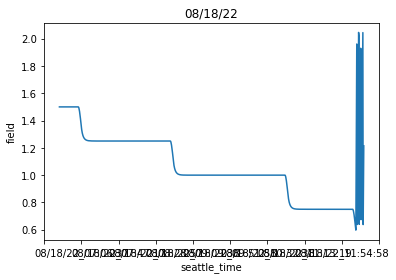

In [17]:
%matplotlib inline
query_nmr_table = '''
                    SELECT *
                    FROM he6cres_runs.nmr 
                    ORDER BY nmr_id DESC 
                    LIMIT 1000
                  '''

nmr_table = db.he6cres_db_query(query_nmr_table).iloc[::-1]
nmr_table["seattle_time"] = nmr_table["created_at"].dt.tz_localize('UTC').dt.tz_convert('US/Pacific').dt.strftime('%D_%H:%M:%S')
plot = sns.lineplot(data=nmr_table, x="seattle_time", y="field")
date = nmr_table["created_at"].dt.tz_localize('UTC').dt.tz_convert('US/Pacific').dt.strftime('%D')[0]
plot.xaxis.set_major_locator(ticker.LinearLocator(10))
plot.set_title("{}".format(date))
plt.show()